In [1]:
!pip install pgmpy

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.2 MB/s eta 0:00:00


In [2]:
dataset_path = 'train.csv'
df = pd.read_csv(dataset_path)

In [3]:
# Pré-processamento
# Tratar valores nulos
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

<ipython-input-3-317832115d49>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-3-317832115d49>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
# Codificar variáveis categóricas

label_encoder = LabelEncoder()
for col in ['Sex', 'Embarked']:
  df[col] = label_encoder.fit_transform(df[col])

In [7]:
# Variavel alvo
target = 'Survived'
X = df.drop(columns=[target])
y = df[target]

In [8]:
# Aprendizado Automático da Estrutura
# Hill Climbing para aprendizado da estrutura
hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [10]:
# Criar e ajustar o modelo
model = BayesianNetwork(best_model.edges())
model.fit(df, estimator=MaximumLikelihoodEstimator)

In [25]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list, auc_list = [], [], [], []

for train_index, test_index in kf.split(df):

    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    model.fit(train_df, estimator=MaximumLikelihoodEstimator)

    test_features = test_df[[node for node in model.nodes() if node != target]]

    for col in test_features.columns:
        test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)

    y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']
    y_true = test_df['Survived']

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    auc_list.append(auc)

metrics_df = pd.DataFrame({
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_list,
    'AUC': auc_list
})

<ipython-input-25-93f7d8d322f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)
<ipython-input-25-93f7d8d322f6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']


  0%|          | 0/57 [00:00<?, ?it/s]

<ipython-input-25-93f7d8d322f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)
<ipython-input-25-93f7d8d322f6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']


  0%|          | 0/55 [00:00<?, ?it/s]

<ipython-input-25-93f7d8d322f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)
<ipython-input-25-93f7d8d322f6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']


  0%|          | 0/62 [00:00<?, ?it/s]

<ipython-input-25-93f7d8d322f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)
<ipython-input-25-93f7d8d322f6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']


  0%|          | 0/66 [00:00<?, ?it/s]

<ipython-input-25-93f7d8d322f6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[col] = test_features[col].apply(lambda x: x if x in train_df[col].unique() else np.nan)
<ipython-input-25-93f7d8d322f6>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_pred = model.predict(test_features.fillna(method='ffill'))['Survived']


  0%|          | 0/54 [00:00<?, ?it/s]

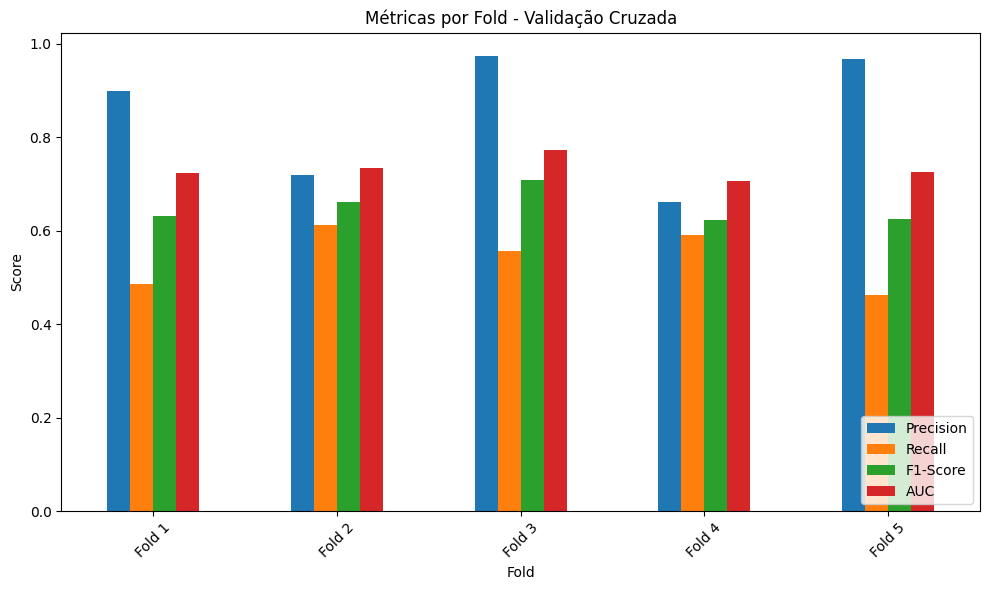

Médias das Métricas por Validação Cruzada:
Precision    0.844611
Recall       0.541603
F1-Score     0.650192
AUC          0.732910
dtype: float64


In [26]:
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title("Métricas por Fold - Validação Cruzada")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.xticks(ticks=range(5), labels=[f'Fold {i+1}' for i in range(5)], rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

print("Médias das Métricas por Validação Cruzada:")
print(metrics_df.mean())